Using GPU 3
Found 12 CPUs and 4 GPUs. Using 3 threads. max_threads = 12
HyperParameter Scan:  240 possible combiniations.
______________________________________
ScanConfiguration
______________________________________
Picked combination:  0
Combo[0]={'Width': 32, 'Depth': 1, 'lr': 0.01, 'optimizer': "'RMSprop'", 'decay': 0.01}
Model Filename:  CaloDNN_32_1_0.01_RMSprop_0.01
______________________________________
Test Mode: Set MaxEvents to 20000 and Epochs to 10
Couldn't import dot_parser, loading of dot files will not be possible.


Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 3: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5105)


Searching in : /data/LCD/*/*.h5
Found 639 files.
Train Class Index Map: {'Pi0': 0, 'ChPi': 1, 'Gamma': 2, 'Ele': 3}
Caching data on disk for faster processing after first epoch. Hope you have enough disk space.
Looking for Previous Model to load.
Loading Previous Model From: TrainedModels.Test/CaloDNN_32_1_0.01_RMSprop_0.01_Merged.41
Output Directory: TrainedModels.Test/CaloDNN_32_1_0.01_RMSprop_0.01_Merged.42
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 25, 25, 25)    0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 5, 5, 60)      0                                            
_________________________________________________________________________________

/home/afarbin/.virtualenvs/keras2/local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


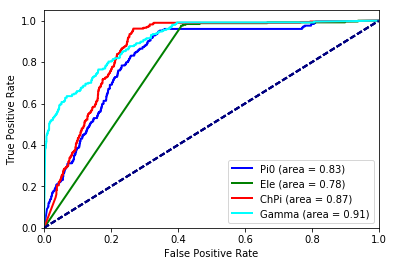

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%run -im CaloDNN.ClassificationExperiment -- --Test

In [17]:
from DLAnalysis.Scan import *
MyModels=[MyModel]
# Rename the Models using Width and Depth
ResetNames(MyModels,["Width","Depth"])

# Add the number of epochs to MetaData by counting length of history
GetEpochs(MyModels)

# Pull data from previous trainings into latest MetaData, with "All_" suffix
print "Historical Parameters:",GetHistorical(MyModels) 
print "-------------"
print "MetaData:",MyModel.MetaData.keys()
print "-------------"

print "Available Parameters:", GetGoodParams(MyModels)

Historical Parameters: ['All_Width', 'All_History.val_acc', 'All_History.loss', 'All_HyperParamSet', 'All_History.val_loss', 'All_History.acc', 'All_decay', 'All_lr', 'All_Depth']
-------------
MetaData: ['Loss', 'History', 'All_History.loss', 'optimizer', 'Name', 'OptimizerConfig', 'All_Depth', 'Ele_AUC', 'Width', 'Depth', 'All_History.acc', 'Pi0_AUC', 'FinalScore', 'All_decay', 'EpochTime', 'HyperParamSet', 'Configuration', 'Optimizer', 'InitialScore', 'InputMetaData', 'decay', 'All_Width', 'All_History.val_acc', 'OptimizerClass', 'All_HyperParamSet', 'All_History.val_loss', 'Metrics', 'InputDir', 'lr', 'Epochs', 'Gamma_AUC', 'ChPi_AUC', 'OutDir', 'All_lr']
-------------
Available Parameters: ['Ele_AUC', 'Width', 'Depth', 'Pi0_AUC', 'HyperParamSet', 'decay', 'lr', 'Epochs', 'Gamma_AUC', 'ChPi_AUC']


In [4]:
ScanTable(MyModels,['Model Name', 'Width', 'Depth', 'Epochs', 'Ele_AUC',  'Pi0_AUC', 'ChPi_AUC',  'Gamma_AUC'],[1,2,0])

Model Name          Width    Depth    Epochs    Ele_AUC    Pi0_AUC    ChPi_AUC    Gamma_AUC
----------------  -------  -------  --------  ---------  ---------  ----------  -----------
Width=32 Depth=1       32        1       250     0.7844     0.8337      0.8660       0.9066


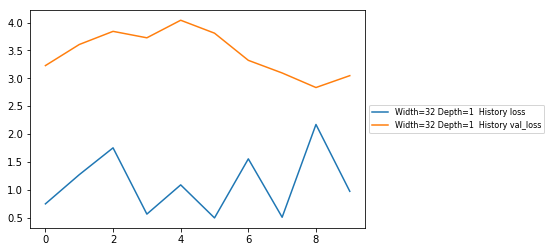

In [20]:
PlotMetaDataMany(MyModels,4,
                [["History","loss"],["History","val_loss"]],
                     sort=["Width","Depth","lr","decay"],switch=["Width","Depth"],loc="center left")

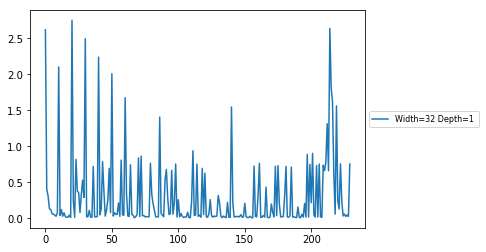

In [24]:
PlotMetaData(MyModels,["All_History.loss"])

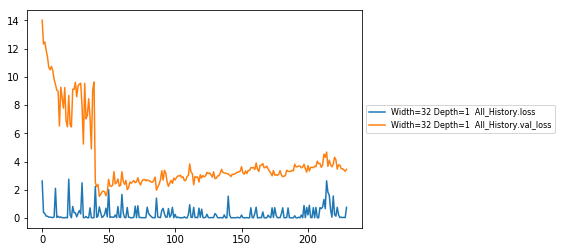

In [25]:
PlotMetaDataMany(MyModels,4,
                [["All_History.loss"],["All_History.val_loss"]],
                     sort=["Width","Depth","lr","decay"],switch=["Width","Depth"],loc="center left")